## Electric Motor Temperature - PMSM temperature data

PMSM이란 영구 자석 동기 모터를 말한다. 영구 자석에 의해 전기장 자극이 제공되고 사인파 후면 EMF 파형이 있는 AC 동기 모터이다. 모터에는 영구자석 회전자와 고정자의 권선이 있으며, 영구 자석을 통해 제로 속도에서 회전력을 생성할 수 있다는 특징을 가진다. 작동을 위해서는 디지털 방식으로 제어되는 인버터가 필요하다.

PMSM은 일반적으로 고성능 고효율 모터 드라이브에 사용된다. 고성능 모터 제어는 모터의 전체 속도 범위에서 부드러운 회전, 제로 속도에서의 최대 토크 제어, 빠른 가속 및 감속이 특징이다.

빠른 가속 및 감속을 하기 위해 벡터 제어 기법이 사용되는데, 이는 d축의 제어를 통해 해결할 수 있다.

PMSM의 온도를 결정하는 주 요인은 회전자 온도, 고정자 온도, 토크 세 가지로 구성된다.

본 데이터 셋의 경우 모터 전체의 온도에 대한 칼럼은 존재하지 않는다.

참조 : https://m.blog.naver.com/lagrange0115/221292390459, https://kr.element14.com/motor-control-permanent-magnet-sync-motor-pmsm-technology, http://blog.naver.com/PostView.nhn?blogId=lagrange0115&logNo=220762793906&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView, https://m.blog.naver.com/lagrange0115/221292390459

**데이터는 하나의 csv파일로 구성되어있으며, 컬럼들은 다음으로 이루어져 있다.**
***
- ambient : 모터가 사용되는 주변 온도
- coolant : 냉각제 온도
- u_d : 전압 축 u에서의 d축 좌표 값
- u_q : 전압 축 u에서의 q축 좌표 값
- motor_speed : 모터 스피드
- torque : 전류에 의해 작용하는 회전력.
- i_d : 전류 축 i에서의 d축 좌표 값
- i_q : 전류 축 i에서의 q축 좌표 값
- pm : 회전자 온도를 나타내는 영구 자석 표면 온도
- stator_yoke : 고정자 요크의 온도
- stator_tooth : 고정자 이빨의 온도
- stator_winding : 고정자 주위에 감긴 구리선(권선)의 온도
- profile_id : 측정 세션의 키 값.
- 표본 비율은 2Hz(0.5초당 1행)
***

데이터 목표

* 회전자 온도 pm, 고정자 온도 "stator_%", 토크가 모터온도의 주요 인자.
* 따라서 pm, stator_%, 토크 사이의 다중공선성이 존재할 경우 pca를 통하여 목적변수를 단일화하여 실험 진행.   

* 회전자 온도에 대한 강력한 예측값을 가질 수 있다는 것은 자동차 산업이 재료가 적은 모터를 제조할 수 있도록 돕고 모터를 최대 능력으로 활용할 수 있는 제어 전략을 가능하게 함. 

* 따라서 정확한 토크 추정치는 모터의 정확하고 적절한 제어로 이어지며 전력 손실을 줄이고 결국 열 축적을 줄임.

* d축 : d축은 통상 모터의 자속(flux)이 발생하는 축으로 고정자 U상 권선에서 발생한 자속의 방향으로 선정. 따라서 d축은 벡터 제어에서 기준이 되는 축.

* q축 : q축은 d축과 직교를 이루는 축으로 벡터 제어에서 토크를 발생시키는 전류의 축. 따라서 전류 제어를 하는 경우 q축을 제어.


<< 고정자, 회전자에 대한 설명 >>   

![image](https://user-images.githubusercontent.com/56014940/86112898-84786480-bb03-11ea-9683-8e1382da1a51.png)
***


![KakaoTalk_20200630_181454936](https://user-images.githubusercontent.com/56014940/86112959-98bc6180-bb03-11ea-824e-23907561cd6f.png)   

<< 실제 고정자 사진 >>

***



![KakaoTalk_20200630_181354605](https://user-images.githubusercontent.com/56014940/86112961-99ed8e80-bb03-11ea-801d-15eb7a7703c2.png)   
<< 고정자 단면도 >>   
***   

![image](https://user-images.githubusercontent.com/56014940/86114647-ca362c80-bb05-11ea-8638-d0e4f8ecc2a3.png)   


![image](https://user-images.githubusercontent.com/56014940/86114930-2f8a1d80-bb06-11ea-828e-15d7b8f687e3.png)   


In [ ]:
import pandas as pd
data = pd.read_csv('pmsm_temperature_data.csv')

data.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


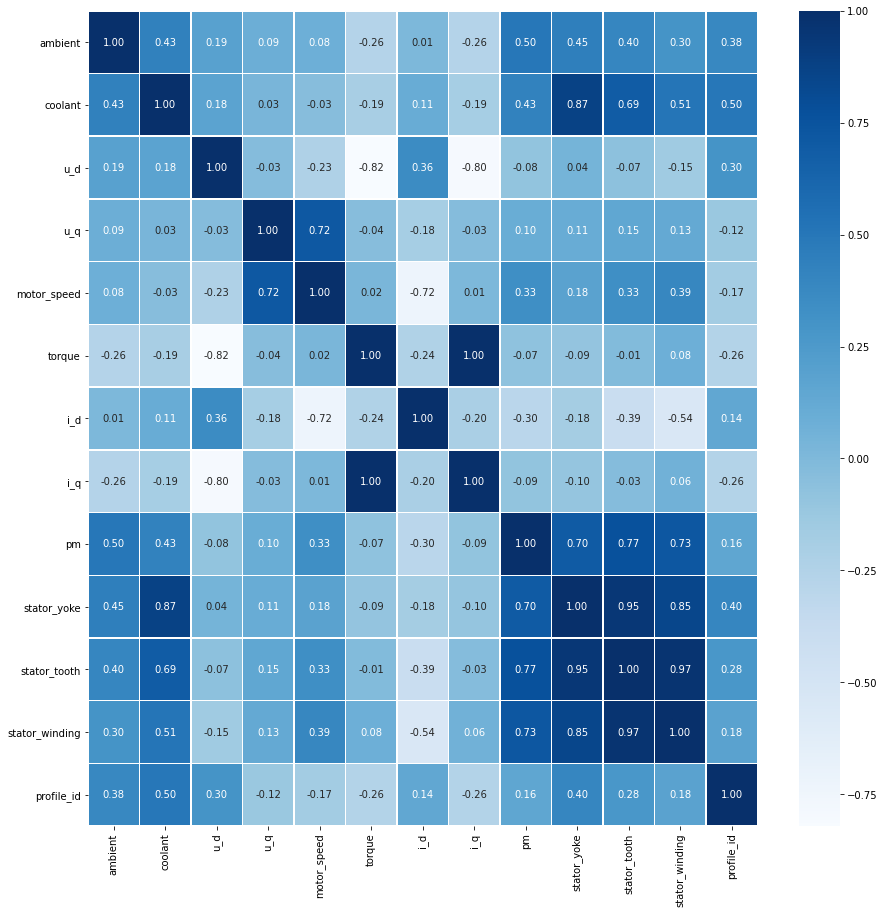

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns    
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
target = data.loc[:,["pm","stator_yoke","stator_tooth","stator_winding"]]
target

,pm,stator_yoke,stator_tooth,stator_winding
0,-2.522071,-1.831422,-2.066143,-2.018033
1,-2.522418,-1.830969,-2.064859,-2.017631
2,-2.522673,-1.830400,-2.064073,-2.017343
3,-2.521639,-1.830333,-2.063137,-2.017632
4,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...
998065,0.429853,1.018568,0.836084,0.494725
998066,0.429751,1.013417,0.834438,0.494279
998067,0.429439,1.002906,0.833936,0.492666
998068,0.429558,0.999157,0.830504,0.490581


In [ ]:
target.corr()

,pm,stator_yoke,stator_tooth,stator_winding
pm,1.000000,0.695014,0.768352,0.729561
stator_yoke,0.695014,1.000000,0.949898,0.845144
stator_tooth,0.768352,0.949898,1.000000,0.965633
stator_winding,0.729561,0.845144,0.965633,1.000000


* torque를 제외한 pm, stator_yoke, stator_tooth, stator_widing이 높은 상관관계를 보이고 있음.

-> pm~stator_winding을 PCA를 통하여 차원축소 진행.
-> torque는 단일 모델로 사용하고, PCA모델의 결과와 결합.
-> torque와 PCA의 모델은 독립적이기 때문.

In [ ]:
from sklearn.decomposition import PCA

pca_target = target
pca_target.head()

,pm,stator_yoke,stator_tooth,stator_winding
0,-2.522071,-1.831422,-2.066143,-2.018033
1,-2.522418,-1.830969,-2.064859,-2.017631
2,-2.522673,-1.830400,-2.064073,-2.017343
3,-2.521639,-1.830333,-2.063137,-2.017632
4,-2.521900,-1.830498,-2.062795,-2.018145


In [ ]:
pca = PCA(n_components=4)
Xlow = pca.fit_transform(pca_target)

In [ ]:
pca_target2 = pca.inverse_transform(Xlow)

In [ ]:
pd.DataFrame(Xlow).head()

,0,1,2,3
0,-4.183849,0.710603,-0.043310,-0.003917
1,-4.182892,0.711435,-0.043231,-0.004637
2,-4.182157,0.712094,-0.043353,-0.004954
3,-4.181306,0.711346,-0.043639,-0.005771
4,-4.181587,0.711486,-0.043841,-0.006350


In [ ]:
pd.DataFrame(pca_target2).head()

,0,1,2,3
0,-2.522071,-1.831422,-2.066143,-2.018033
1,-2.522418,-1.830969,-2.064859,-2.017631
2,-2.522673,-1.830400,-2.064073,-2.017344
3,-2.521639,-1.830333,-2.063137,-2.017632
4,-2.521900,-1.830498,-2.062795,-2.018145


In [ ]:
pca_target.head()

,pm,stator_yoke,stator_tooth,stator_winding
0,-2.522071,-1.831422,-2.066143,-2.018033
1,-2.522418,-1.830969,-2.064859,-2.017631
2,-2.522673,-1.830400,-2.064073,-2.017343
3,-2.521639,-1.830333,-2.063137,-2.017632
4,-2.521900,-1.830498,-2.062795,-2.018145


In [ ]:
pca.components_

array([[ 0.45217019,  0.50401587,  0.53076494,  0.50970452],
       [-0.88599958,  0.34880767,  0.21982701,  0.21216512],
       [-0.09052286, -0.69902815,  0.06235971,  0.70659502],
       [ 0.04850236,  0.36832167, -0.81613475,  0.44261806]])

In [ ]:
pca.explained_variance_ratio_

array([8.71991852e-01, 8.90531508e-02, 3.84125504e-02, 5.42446431e-04])

* 주성분의 누적기여율이 각각 0.87, 0.08, 0.03, 0.0005 이므로 첫 번째 주성분만 사용해도 무방하다고 판단. 하지만 inverse_transform 결과 주성분이 하나일 경우 원본 데이터와 편차가 존재.

* 따라서 종속변수로 PCA1(= 0.45pm + 0.5stator_yoke + 0.53stator_tooth + 0.5stator_winding), PCA2(= -0.88pm + 0.34stator_yoke + 0.21stator_tooth + 0.21stator_widing)으로 결정.

* torque의 경우 온도가 아닌 물리적인 값이므로 제외.

In [ ]:
pca = PCA(n_components = 2)
Xlow = pca.fit_transform(pca_target)
y_pca = pd.DataFrame(Xlow, columns = ["y_PCA1","y_PCA2"])
y_pca.head()

,y_PCA1,y_PCA2
0,-4.183849,0.710603
1,-4.182892,0.711435
2,-4.182157,0.712094
3,-4.181306,0.711346
4,-4.181587,0.711486


In [ ]:
pd.DataFrame(pca.inverse_transform(Xlow)).head()

,0,1,2,3
0,-2.525802,-1.860254,-2.066639,-1.985697
1,-2.526106,-1.859481,-2.065947,-1.985032
2,-2.526357,-1.858881,-2.065413,-1.984518
3,-2.525309,-1.858713,-2.065125,-1.984242
4,-2.525561,-1.858805,-2.065244,-1.984356


In [ ]:
target.head()

,pm,stator_yoke,stator_tooth,stator_winding
0,-2.522071,-1.831422,-2.066143,-2.018033
1,-2.522418,-1.830969,-2.064859,-2.017631
2,-2.522673,-1.830400,-2.064073,-2.017343
3,-2.521639,-1.830333,-2.063137,-2.017632
4,-2.521900,-1.830498,-2.062795,-2.018145


In [ ]:
x = data.loc[:,["ambient","coolant","u_d","u_q", "torque","motor_speed","i_d","i_q","profile_id"]]
x

,ambient,coolant,u_d,u_q,torque,motor_speed,i_d,i_q,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-0.250182,-1.222428,1.029572,-0.245860,4
1,-0.771263,-1.117021,0.329665,-1.297686,-0.249133,-1.222429,1.029509,-0.245832,4
2,-0.782892,-1.116681,0.332771,-1.301822,-0.249431,-1.222428,1.029448,-0.245818,4
3,-0.780935,-1.116764,0.333700,-1.301852,-0.248636,-1.222430,1.032845,-0.246955,4
4,-0.774043,-1.116775,0.335206,-1.303118,-0.248701,-1.222429,1.031807,-0.246610,4
...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-0.255640,-1.222428,1.029142,-0.245722,72
998066,-0.048839,0.320022,0.331701,-1.250655,-0.255640,-1.222437,1.029148,-0.245736,72
998067,-0.042350,0.307415,0.330946,-1.246852,-0.255640,-1.222430,1.029191,-0.245701,72
998068,-0.039433,0.302082,0.330987,-1.249505,-0.255640,-1.222432,1.029147,-0.245727,72


In [ ]:
data1 = pd.concat([x,y_pca], axis=1)

In [ ]:
data1

,ambient,coolant,u_d,u_q,torque,motor_speed,i_d,i_q,profile_id,y_PCA1,y_PCA2
0,-0.752143,-1.118446,0.327935,-1.297858,-0.250182,-1.222428,1.029572,-0.245860,4,-4.183849,0.710603
1,-0.771263,-1.117021,0.329665,-1.297686,-0.249133,-1.222429,1.029509,-0.245832,4,-4.182892,0.711435
2,-0.782892,-1.116681,0.332771,-1.301822,-0.249431,-1.222428,1.029448,-0.245818,4,-4.182157,0.712094
3,-0.780935,-1.116764,0.333700,-1.301852,-0.248636,-1.222430,1.032845,-0.246955,4,-4.181306,0.711346
4,-0.774043,-1.116775,0.335206,-1.303118,-0.248701,-1.222429,1.031807,-0.246610,4,-4.181587,0.711486
...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-0.255640,-1.222428,1.029142,-0.245722,72,1.408526,0.260404
998066,-0.048839,0.320022,0.331701,-1.250655,-0.255640,-1.222437,1.029148,-0.245736,72,1.404783,0.258242
998067,-0.042350,0.307415,0.330946,-1.246852,-0.255640,-1.222430,1.029191,-0.245701,72,1.398256,0.254399
998068,-0.039433,0.302082,0.330987,-1.249505,-0.255640,-1.222432,1.029147,-0.245727,72,1.393536,0.251790


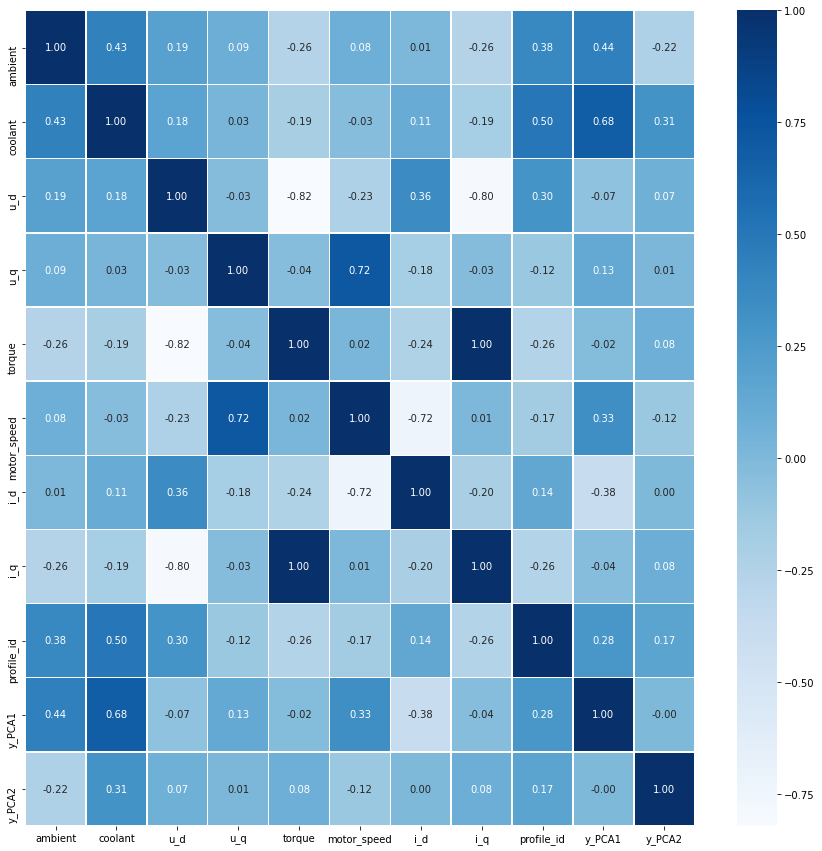

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns    
plt.figure(figsize=(15,15))
sns.heatmap(data = data1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
torque_i = data.loc[:,["i_q","torque"]]
motor_speed_u = data.loc[:,["motor_speed","u_q"]]

In [ ]:
print(torque_i.corr())
print(motor_speed_u.corr())

            i_q   torque
i_q     1.00000  0.99656
torque  0.99656  1.00000
             motor_speed       u_q
motor_speed     1.000000  0.716897
u_q             0.716897  1.000000


In [ ]:
torque_i_pca = PCA(n_components = 1)
torque_i_Xlow = torque_i_pca.fit_transform(torque_i)

motor_speed_u_pca = PCA(n_components=1)
motor_speed_u_Xlow = motor_speed_u_pca.fit_transform(motor_speed_u)

In [ ]:
print(torque_i_pca.explained_variance_ratio_)
print(motor_speed_u_pca.explained_variance_ratio_)

[0.99827994]
[0.85844895]


In [ ]:
print(torque_i_pca.components_)
print(motor_speed_u_pca.components_)

[[-0.70710877 -0.7071048 ]]
[[0.70656461 0.70764854]]


* motor_speed와 u_q의 경우 축약해도 주성분 1개로는 충분하지 않음.   
(누적 기여율 : 0.85)
* 반면 torque와 i_q의 경우 주성분 1개로 99%의 설명력을 가짐
- 따라서 torque + i_q를 x_PCA로 축약
- motor_speed와 u_q의 경우 변수 그대로 사용

* PCA1 = -0.7 i_d -0.7 torque

In [ ]:
x_pca = pd.DataFrame(torque_i_Xlow,columns = ["x_PCA"])
x_pca

,x_PCA
0,0.346140
1,0.345378
2,0.345579
3,0.345821
4,0.345622
...,...
998065,0.349901
998066,0.349911
998067,0.349887
998068,0.349905


In [ ]:
torque_i_inverse=torque_i_pca.inverse_transform(torque_i_Xlow)
torque_i_inverse

array([[-0.24795233, -0.24808979],
       [-0.24741407, -0.24755153],
       [-0.24755577, -0.24769323],
       ...,
       [-0.25060185, -0.2507393 ],
       [-0.2506147 , -0.25075214],
       [-0.25061225, -0.2507497 ]])

In [ ]:
motor_speed_u_Xlow

array([[-1.7736487 ],
       [-1.77352847],
       [-1.77645367],
       ...,
       [-1.73755565],
       [-1.73943466],
       [-1.73737187]])

In [ ]:
motor_speed_u_inverse = motor_speed_u_pca.inverse_transform(motor_speed_u_Xlow)
motor_speed_u_inverse

array([[-1.2595329 , -1.26080963],
       [-1.25944795, -1.26072455],
       [-1.2615148 , -1.26279457],
       ...,
       [-1.23403083, -1.23526844],
       [-1.23535848, -1.23659812],
       [-1.23390098, -1.23513839]])

In [ ]:
motor_speed_u

,motor_speed,u_q
0,-1.222428,-1.297858
1,-1.222429,-1.297686
2,-1.222428,-1.301822
3,-1.222430,-1.301852
4,-1.222429,-1.303118
...,...,...
998065,-1.222428,-1.246114
998066,-1.222437,-1.250655
998067,-1.222430,-1.246852
998068,-1.222432,-1.249505


* moter_speed와 u_q는 편차가 실제 값과 크진 않으나, 주성분을 2개로 쓰게 되면 차원축소의 의미가 없다.
* torque와 i_q는 차원축소의 관계가 유의미 하다. 따라서 torque와 i_q는 차원축소를 하여 분석대상으로 진행한다.

#### 변수 축소 -> torque, i_q : x_PCA,    
#### pm,stator_yoke, stator_tooth, stator_winding : PCA1, PCA2로 결정하여 원본 데이터의 칼럼을 줄이는 작업 시행.

* 차원축소를 통해 기존의 13개 변수에서 10개 변수로 축약 가능 및 다중 공선성 최소화.

* 최종 데이터 셋으로 VIF 검정 진행.

In [ ]:
total_data = data.drop(["pm","stator_yoke","stator_tooth","stator_winding","torque","i_q"],axis=1)

In [ ]:
total_data = pd.concat([total_data,x_pca,y_pca],axis=1)
total_data.head()

,ambient,coolant,u_d,u_q,motor_speed,i_d,profile_id,x_PCA,y_PCA1,y_PCA2
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,1.029572,4,0.346140,-4.183849,0.710603
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,1.029509,4,0.345378,-4.182892,0.711435
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,1.029448,4,0.345579,-4.182157,0.712094
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,1.032845,4,0.345821,-4.181306,0.711346
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,1.031807,4,0.345622,-4.181587,0.711486


In [ ]:
total_data = total_data.drop(["y_PCA2","profile_id"],axis=1)

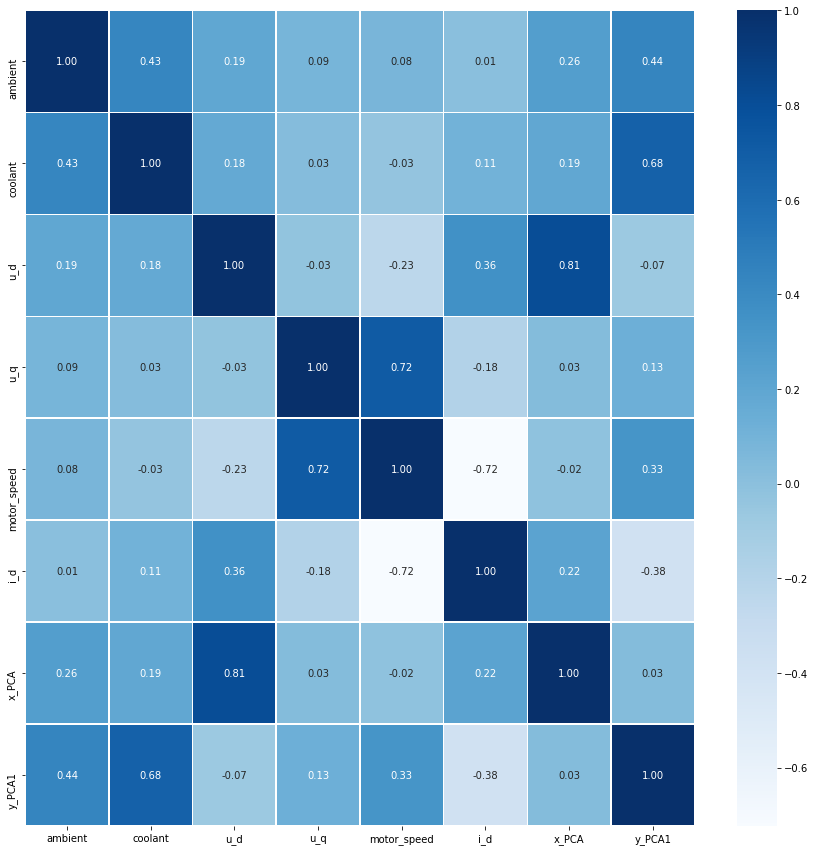

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- x_PCA와 u_d가 상관관계가 0.81로 강한모습을 보여줌
- PCA 변수 축소하기 이전에 u_d와 i_q가 강한 음의 상관관계를 보였기 때문
- linear regression 회귀분석 진행에 지장이 있을지 VIF 계수로 관찰

In [ ]:
from patsy import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_y, vif_x = dmatrices('y_PCA1 ~ ambient + coolant + u_d + u_q + motor_speed + i_d + motor_speed + i_d + x_PCA',data=total_data, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_x.values, i) for i in range(vif_x.shape[1])]
vif["features"] = vif_x.columns
vif.round(1)

,VIF Factor,features
0,1.0,Intercept
1,1.3,ambient
2,1.3,coolant
3,3.9,u_d
4,4.8,u_q
5,10.7,motor_speed
6,5.0,i_d
7,4.0,x_PCA


- VIF 계수가 오히려 u_d보다 motor_speed에서 높게 나옴
- 하지만 VIF 계수가 15를 넘어가지 않으므로 회귀분석에 지장이 없음.

In [ ]:
y = total_data.loc[:,"y_PCA1"]
x = total_data.loc[:,:"x_PCA"]
print(y.head())
print(x.head())

0   -4.183849
1   -4.182892
2   -4.182157
3   -4.181306
4   -4.181587
Name: y_PCA1, dtype: float64
    ambient   coolant       u_d       u_q  motor_speed       i_d     x_PCA
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428  1.029572  0.346140
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429  1.029509  0.345378
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428  1.029448  0.345579
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430  1.032845  0.345821
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429  1.031807  0.345622


- 여러번 실험을 진행했으나 종속변수가 두 개일 경우 대다수의 sklearn에서 다중 종속변수를 지원하지 않음
- 지난번 CNC Milling Dataset에서 다중 종속변수가 아닌 종속변수별 실험을 잘못 관측함
- 이에 따라 주성분1만 종속변수로 설정. 종속변수의 제 1주성분은 0.87의 누적기여율을 가지므로 종속변수 대다수를 설명할 수 있기 때문에 분석진행.

#### Data split

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.33,random_state=123)

In [ ]:
train_x

,ambient,coolant,u_d,u_q,motor_speed,i_d,x_PCA
339259,-0.220472,-0.180476,-0.403790,1.546530,0.941941,-0.112864,-0.095223
327317,-0.459517,0.377016,0.315849,-1.330556,-1.222431,1.029147,0.349897
369436,-0.139411,0.323597,1.177675,0.139803,-0.348314,0.570178,1.917082
797124,-1.022138,-0.355820,0.848799,-0.518742,-0.729976,0.473903,2.150307
498,-0.802005,-1.054030,0.183145,1.676523,2.024118,-0.818369,0.362874
...,...,...,...,...,...,...,...
192476,-1.212341,-1.076090,0.286822,-1.168538,-1.189990,0.924248,-0.320327
17730,-0.581731,-1.057742,-0.955778,0.646803,-0.140251,0.386204,-1.530400
28030,0.074134,-1.094394,0.310154,-0.707684,-0.951874,1.029142,0.349658
277869,-2.749614,-1.090646,0.167840,0.403517,-0.410789,1.013982,0.144918


In [ ]:
test_x

,ambient,coolant,u_d,u_q,motor_speed,i_d,x_PCA
3111,-0.772997,-1.089701,0.182099,1.683184,2.024116,-0.752583,0.362052
799023,-1.011524,-0.419708,0.328520,-1.247393,-1.222433,1.029146,0.349892
584523,1.224529,1.242529,1.281067,1.360941,0.356871,0.650730,1.265631
877382,0.687867,1.011146,-0.805500,-0.243584,-0.525878,-0.214219,-2.441380
191182,-1.254247,-1.065719,-1.600072,-0.629632,1.282829,-1.899374,-0.916812
...,...,...,...,...,...,...,...
922450,0.371054,1.181418,0.575920,-0.285228,-0.673782,0.927992,1.034290
269749,-2.749857,-1.086847,0.224841,-0.254412,-0.735445,1.013972,0.145638
163334,-0.903968,-1.080274,-0.223364,-0.053758,-0.600171,0.703620,-0.907719
51334,2.017241,-0.166467,-1.175688,0.693532,1.483032,-1.000787,-0.468163


In [ ]:
train_y

339259   -0.560281
327317   -1.505569
369436    0.500476
797124   -2.812158
498      -2.305082
            ...   
192476   -2.067085
17730    -2.270284
28030    -3.230032
277869   -2.842089
773630   -1.056901
Name: y_PCA1, Length: 668706, dtype: float64

In [ ]:
test_y

3111     -0.859529
799023   -1.258588
584523    3.039521
877382    2.292146
191182    1.860084
            ...   
922450    1.394634
269749   -2.936086
163334   -2.701975
51334     2.931718
15117    -3.402462
Name: y_PCA1, Length: 329364, dtype: float64

### Linear regression

In [ ]:
import statsmodels.api as sm
lm = sm.OLS(train_y,train_x)

In [ ]:
model=lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 y_PCA1   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                          2.098e+05
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                        0.00
Time:                        06:07:16   Log-Likelihood:                     -9.7776e+05
No. Observations:              668706   AIC:                                  1.956e+06
Df Residuals:                  668699   BIC:                                  1.956e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ambient         0.3034      0.001    206.817      0.000       0.301       0.306
coolant         1.2309      0.001    862.211      0.000       1.228       1.234
u_d            -0.1618      0.003    -64.375      0.000      -0.167      -0.157
u_q            -0.0041      0.003     -1.456      0.145      -0.010       0.001
motor_speed     0.0610      0.004     14.636      0.000       0.053       0.069
i_d            -0.7517      0.003   -263.702      0.000      -0.757      -0.746
x_PCA           0.0322      0.002     17.852      0.000       0.029       0.036
==============================================================================
Omnibus:                    14606.560   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20444.172
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       3.683   Cond. No.                         7.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

회귀분석 결과 통계적으로 무의미한 변수는 다음과 같음.
> u_q(p-value : 0.066)   

- 우려했던 motor_speed보다 PCA후 상관관계가 존재했던 u_q 변수가 탈락함을 관측.   

해당 변수를 제외하고 회귀모델에 적합한 모델이라고 판단할 수 있음.
train_x에서 u_q를 제외하고 다시 회귀모델 훈련 진행


In [ ]:
import statsmodels.api as sm
lm1 = sm.OLS(train_y,train_x.drop(["u_q"],axis=1))
model=lm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 y_PCA1   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                          2.447e+05
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                        0.00
Time:                        06:07:17   Log-Likelihood:                     -9.7776e+05
No. Observations:              668706   AIC:                                  1.956e+06
Df Residuals:                  668700   BIC:                                  1.956e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ambient         0.3033      0.001    206.883      0.000       0.300       0.306
coolant         1.2309      0.001    862.228      0.000       1.228       1.234
u_d            -0.1631      0.002    -69.111      0.000      -0.168      -0.158
motor_speed     0.0556      0.002     28.576      0.000       0.052       0.059
i_d            -0.7548      0.002   -386.772      0.000      -0.759      -0.751
x_PCA           0.0333      0.002     20.148      0.000       0.030       0.037
==============================================================================
Omnibus:                    14660.922   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20533.784
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       3.684   Cond. No.                         3.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 변수 i_q를 제거해도 모델의 R2-score나 각 변수들의 coef는 그대로인 것을 확인함.

- 따라서 기존모델로 predict 값을 산출해도 지장이 없을것이라고 예상.


In [ ]:
import numpy as np
F_test = model.f_test(np.identity(6))

In [ ]:
F_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[244741.3914587]]), p=0.0, df_denom=6.69e+05, df_num=6>

F 검정 확인결과 해당 회귀모델은 통계적으로 유의함을 알 수 있다. (p-value = 0 < 0.05)

In [ ]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression(fit_intercept = True)
model_reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

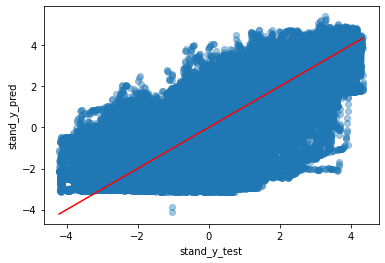

In [ ]:
import numpy as np
y_predict = model_reg.predict(test_x)
plt.scatter(test_y,y_predict, alpha=0.4)
line = np.linspace(min(test_y.values), max(test_y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('stand_y_test')
plt.ylabel('stand_y_pred')
plt.show()

- 산점도로 예측값과 실제값 비교분석 불가능   
- 데이터가 너무 많기 때문   
- 따라서 예측값과 실제값의 히스토그램을 통해 비교분석 진행

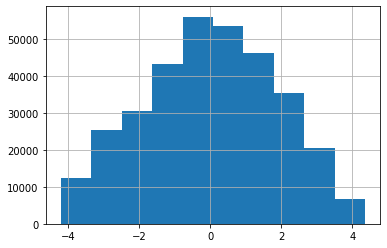

In [ ]:
test_y.hist()

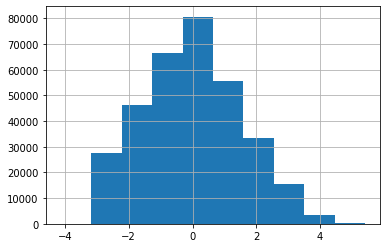

In [ ]:
pd.Series(y_predict).hist()

- 예측값이 실제값에 비해 왼쪽으로 편향되있음을 관측
- r2_score가 0.68임을 감안하면 정상적으로 예측값이 출력됐음을 확인.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_predict)
rmse = np.sqrt(mse)

In [ ]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))

MSE : 1.090, RMSE : 1.044


In [ ]:
print('Variance score : {0:.3f}'.format(r2_score(test_y,y_predict)))

Variance score : 0.685


In [ ]:
print('R2 score : {0:.3f}'.format(model_reg.score(train_x, train_y)))

R2 score : 0.687


### 실험 결과
- 전처리를 통해 높은 R2 score를 가질수 있었고 예측값 또한 나쁘지 않게 생성   
- 기존의 값보다 다소 왼쪽으로 편향된 값 생성   
- 하지만 회귀식에서 변수가 높은 계수를 얻었다고 해도 회귀식 안에서만 유용하지 실제로 그 변수가 종속변수와 밀접한 관계를 가졌다고 해석하기에는 힘듬.

ex) y = 0.7x1 + 0.3x2 일때 y와 x1이 양의 관계를 가졌다고 판단하는건 회귀식 안에서만 가능.



### Decision Tree model 사용

In [ ]:
from sklearn import tree
import time
start = time.time()

clf = tree.DecisionTreeRegressor()
model_clf = clf.fit(train_x,train_y)
print("Decision Tree model time : ", time.time() - start)

Decision Tree model time :  13.485268354415894


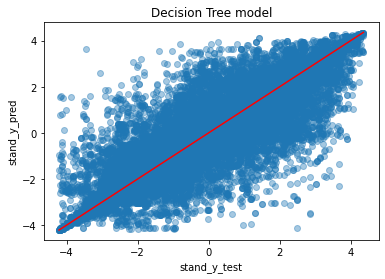

In [ ]:
clf_y_predict = model_clf.predict(test_x)
plt.scatter(test_y,clf_y_predict, alpha=0.4)
line = np.linspace(min(test_y.values), max(test_y.values), 1000)
plt.plot(line, line, color = 'r')
plt.title("Decision Tree model")
plt.xlabel('stand_y_test')
plt.ylabel('stand_y_pred')
plt.show()


- 산점도 역시 비교분석하기 힘들지만 선형 회귀모델에 비해 비교적 회귀직선에 수렴한 분포를 확인할 수 있었다.
- 히스토그램을 통해 보다 자세하게 분석

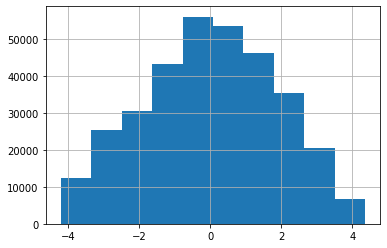

In [ ]:
test_y.hist()

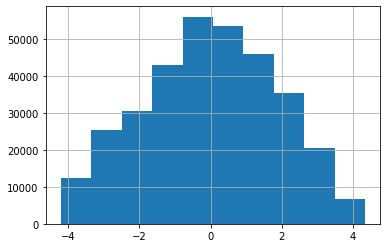

In [ ]:
pd.Series(clf_y_predict).hist()

- 실제값과 거의 동일한 분포의 값들이 산출
- Decision Tree만으로도 충분히 의미있는 결과값 산출을 할 수 있다.
- 앙상블 모델로 accuracy 0.01라도 끌어올릴 수 있다면?
- 추가 분석 진행

In [ ]:
clf_mse = mean_squared_error(test_y, clf_y_predict)
clf_rmse = np.sqrt(clf_mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(clf_mse,clf_rmse))
print('Variance score : {0:.3f}'.format(r2_score(test_y,clf_y_predict)))
print('R2 score : {0:.3f}'.format(model_clf.score(train_x, train_y)))

MSE : 0.091, RMSE : 0.302
Variance score : 0.974
R2 score : 1.000


### RandomForest model 사용

In [ ]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []
start = time.time()
rf = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model_rf = rf.fit(train_x,train_y)
print("Randomforest model time : ", time.time() - start)

Randomforest model time :  624.0853271484375


- 훈련 시간만 무려 10분 30초를 잡아먹는다.   
- 정말 accuracy 향상을 위한게 아니면 그다지 추천하는 작업은 아닐 것 같다.   
- 후에 lightgbm모델도 비슷할 것으로 추측

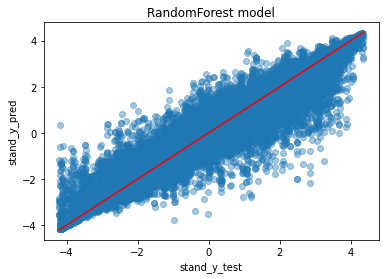

In [ ]:
rf_y_predict = model_rf.predict(test_x)
plt.scatter(test_y,rf_y_predict, alpha=0.4)
line = np.linspace(min(test_y.values), max(test_y.values), 1000)
plt.plot(line, line, color = 'r')
plt.title("RandomForest model")
plt.xlabel('stand_y_test')
plt.ylabel('stand_y_pred')
plt.show()

- Decision Tree에 비해 훈련시간은 길지만 분산이 줄어듬을 확인함.
- 0.01의 accuracy라도 올리는데 효과가 있음을 확인함.

In [ ]:
rf_mse = mean_squared_error(test_y, rf_y_predict)
rf_rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(rf_mse,rf_rmse))
print('Variance score : {0:.3f}'.format(r2_score(test_y,rf_y_predict)))
print('R2 score : {0:.3f}'.format(model_rf.score(train_x, train_y)))

MSE : 0.045, RMSE : 1.044
Variance score : 0.987
R2 score : 0.998


Feature: 0, Score : 0.08328
Feature: 1, Score : 0.54621
Feature: 2, Score : 0.08124
Feature: 3, Score : 0.03086
Feature: 4, Score : 0.02773
Feature: 5, Score : 0.18444
Feature: 6, Score : 0.04623


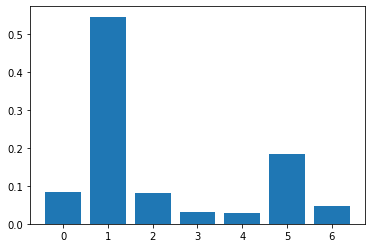

In [ ]:
from matplotlib import pyplot
importance = model_rf.feature_importances_

for i,v in enumerate(importance):
  print('Feature: %0d, Score : %.5f'%(i,v))
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()

In [ ]:
train_x.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'x_PCA'], dtype='object')

- 0.974에서 0.987로 Variance score가 올라감을 확인함
- MSE 또한 0.092에서 0.045로 감소함
- 미세한 성능향상이지만 상위권에서 성능향상이므로 의미있는 분석
- randomforest Regressor의 경우 feature_importance 출력하는 방식이 lightgbm 모델과 차이가 있음.. rf의 경우 coolant와 i_d를 주요인자로 뽑음

### Lightgbm model 사용

In [ ]:
import lightgbm as lgb

train_ds = lgb.Dataset(train_x,label = train_y)
test_ds = lgb.Dataset(test_x,label = test_y)

In [ ]:
params = {'n_estimators' : 10000,
          'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [ ]:
start = time.time()
model_lgb = lgb.train(params, train_ds, 10000, test_ds, verbose_eval=100, early_stopping_rounds=100)
print("lightgbm model time : ", time.time() - start)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 0.957386
[200]	valid_0's l2: 0.510193
[300]	valid_0's l2: 0.391787
[400]	valid_0's l2: 0.337653
[500]	valid_0's l2: 0.304282
[600]	valid_0's l2: 0.28093
[700]	valid_0's l2: 0.263413
[800]	valid_0's l2: 0.250693
[900]	valid_0's l2: 0.240125
[1000]	valid_0's l2: 0.231508
[1100]	valid_0's l2: 0.223911
[1200]	valid_0's l2: 0.216183
[1300]	valid_0's l2: 0.2099
[1400]	valid_0's l2: 0.203158
[1500]	valid_0's l2: 0.197349
[1600]	valid_0's l2: 0.191906
[1700]	valid_0's l2: 0.187203
[1800]	valid_0's l2: 0.18255
[1900]	valid_0's l2: 0.178412
[2000]	valid_0's l2: 0.174171
[2100]	valid_0's l2: 0.17027
[2200]	valid_0's l2: 0.166436
[2300]	valid_0's l2: 0.163269
[2400]	valid_0's l2: 0.160035
[2500]	valid_0's l2: 0.157085
[2600]	valid_0's l2: 0.154473
[2700]	valid_0's l2: 0.151831
[2800]	valid_0's l2: 0.149462
[2900]	valid_0's l2: 0.147084
[3000]	valid_0's l2: 0.14496
[3100]	valid_0's l2: 0.142554
[3200]	valid_0's l2: 0

* Feature importance

>   * 하나의 decision tree에서 각각의 attribute로 이루어진 split point에 의해 얼마나 트리의 성능이 올라가는지를 계산함.  
>   * instance가 split point에 의해 영향을 받는지 숫자만큼 가중치를 두어 성능 향상치를 계산함.   
>   * 앙상블 모델(RF)은 모든 decision tree에 대해 구하고 평균을 냄.   
>   * 성능 측정은 지니계수 또는 information gain을 사용

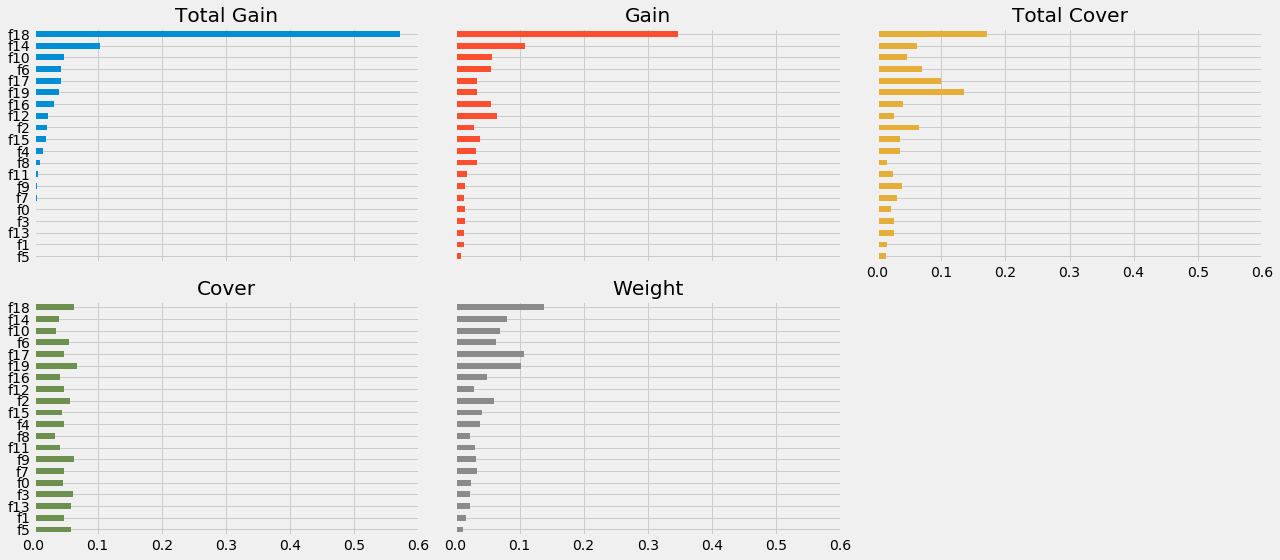   
<< Feature importance 원리 >>

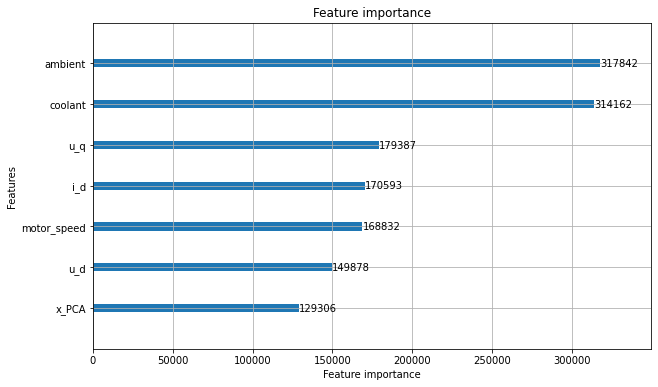

In [ ]:
import matplotlib.pyplot as plt
from lightgbm import plot_importance
fig,ax = plt.subplots(figsize = (10,6))
plot_importance(model_lgb,ax=ax)

In [ ]:
lgb_y_predict_train = model_lgb.predict(train_x)
lgb_y_predict_test = model_lgb.predict(test_x)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lgb_mse = mean_squared_error(test_y, lgb_y_predict_test)
lgb_r2 = r2_score(test_y, lgb_y_predict_test)

In [ ]:
print('lightgbm Mean squared error: ', lgb_mse)
print('lightgbm R2 score: ', lgb_r2)

lightgbm Mean squared error:  0.0840416112105818
lightgbm R2 score:  0.9757575089449554


In [ ]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(lgb_y_predict_test)], axis = 1)

In [ ]:
final_result.columns = ['test_y','predict']

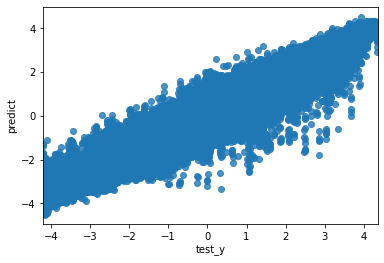

In [ ]:
import seaborn as sns
sns.regplot(x = 'test_y', y = 'predict', data = final_result)

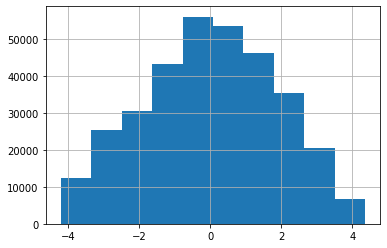

In [ ]:
test_y.hist()

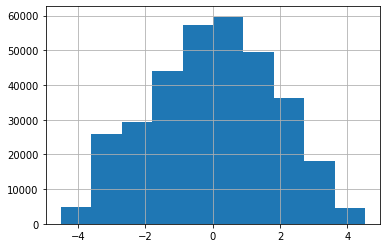

In [ ]:
pd.Series(lgb_y_predict_test).hist()

### MLP model 사용

In [ ]:
train_x

,ambient,coolant,u_d,u_q,motor_speed,i_d,x_PCA
339259,-0.220472,-0.180476,-0.403790,1.546530,0.941941,-0.112864,-0.095223
327317,-0.459517,0.377016,0.315849,-1.330556,-1.222431,1.029147,0.349897
369436,-0.139411,0.323597,1.177675,0.139803,-0.348314,0.570178,1.917082
797124,-1.022138,-0.355820,0.848799,-0.518742,-0.729976,0.473903,2.150307
498,-0.802005,-1.054030,0.183145,1.676523,2.024118,-0.818369,0.362874
...,...,...,...,...,...,...,...
192476,-1.212341,-1.076090,0.286822,-1.168538,-1.189990,0.924248,-0.320327
17730,-0.581731,-1.057742,-0.955778,0.646803,-0.140251,0.386204,-1.530400
28030,0.074134,-1.094394,0.310154,-0.707684,-0.951874,1.029142,0.349658
277869,-2.749614,-1.090646,0.167840,0.403517,-0.410789,1.013982,0.144918


In [ ]:
train_y

339259   -0.560281
327317   -1.505569
369436    0.500476
797124   -2.812158
498      -2.305082
            ...   
192476   -2.067085
17730    -2.270284
28030    -3.230032
277869   -2.842089
773630   -1.056901
Name: y_PCA1, Length: 668706, dtype: float64

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes = (256,16),max_iter=50)

In [ ]:
start = time.time()

mlp.fit(train_x,train_y)
mlp_predict = mlp.predict(test_x)
print("MLP model time : ", time.time() - start)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP model time :  478.24735403060913


In [ ]:
mlp_mse = mean_squared_error(test_y, mlp_predict)
mlp_r2 = r2_score(test_y, mlp_predict)
print('MLP Mean squared error: ', mlp_mse)
print('MLP R2 score: ', mlp_r2)

MLP Mean squared error:  0.30405704242542386
MLP R2 score:  0.9122922558831956


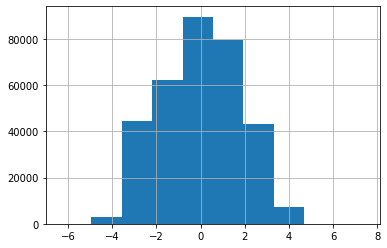

In [ ]:
pd.Series(mlp_predict).hist()

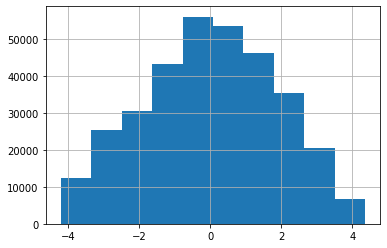

In [ ]:
test_y.hist()

- 여러 실험을 진행했으나, layer가 깊으면 좋은 결과를 배출하긴 함
- 하지만 기하급수적으로 계산시간이 증가함 (레이어 4개, 최대 5470초 소요)
- 빈도가 높은 값들은 잘 맞추나, 빈도가 낮은 값들은 맞추지 못함

## 실험결과 요약

* linear regression model   
MSE : 1.090, RMSE : 1.044   
Variance score : 0.685   
R2 score : 0.687   

* Decision tree model   
MSE : 0.091, RMSE : 1.044   
Variance score : 0.974   
R2 score : 1.000   
Decision Tree model time :  13.966539144515991   

* Random Forest model   
MSE : 0.045, RMSE : 1.044   
Variance score : 0.987   
R2 score : 0.998   
Randomforest model time :  631.9166750907898   

* lightgbm model    
mse:  0.08   
R2 score:  0.96   
lightgbm model time :  590.7603940963745

* MLP model   
mse:  0.31414954216636365   
R2 score:  0.91   
MLP model time :  637.8875794410706

### 실험결과

- 데이터 셋 소개에서 주요 변수로 삼았던 PM , stator_yoke, stator_tooth, stator_winding과는 달리 ambient(모터 주변온도), coolant(냉각수 온도) 또한 주요한 변수로 선정
- 종속 변수와 같이 온도라는 도메인에서 높은 점수를 얻었다고 추정.
